# 모델 저장

- 학습한 모델을 저장장치에 파일로 저장하고 나중에 불러와 사용(추가 학습, 예측 서비스) 할 수 있도록 한다. 
- 파이토치는 **모델의 파라미터만 저장**하는 방법과 **모델 구조와 파라미터 모두를 저장**하는 두가지 방식을 제공한다.
- 저장 함수
    - `torch.save(저장할 객체, 저장경로)`
- 보통 저장파일의 확장자는 `pt`나 `pth` 를 지정한다.

## 모델 전체 저장하기 및 불러오기

- 저장하기
    - `torch.save(model, 저장경로)`
- 불러오기
    - `load_model = torch.load(저장경로)`
- 저장시 **pickle**을 이용해 직렬화하기 때문에 불어오는 실행환경에도 모델을 저장할 때 사용한 클래스가 있어야 한다.



## 모델의 파라미터만 저장
- 모델을 구성하는 파라미터만 저장한다.
- 모델의 구조는 저장하지 않기 때문에 불러올 때 **모델을 먼저 생성하고 생성한 모델에 불러온 파라미터를 덮어씌운다.**
- 모델의 파라미터는 **state_dict** 형식으로 저장한다.

### state_dict
- 모델의 파라미터 Tensor들을 레이어 단위별로 나누어 저장한 Ordered Dictionary (OrderedDict)
- `모델객체.state_dict()` 메소드를 이용해 조회한다.
- 모델의 state_dict을 조회 후 저장한다.
    - `torch.save(model.state_dict(), "저장경로")`
- 생성된 모델에 읽어온 state_dict를 덮어씌운다.
    - `new_model.load_state_dict(torch.load("state_dict저장경로"))`


# Checkpoint를 저장 및 불러오기
- 학습이 끝나지 않은 모델을 저장 후 나중에 이어서 학습시킬 경우에는 모델의 구조, 파라미터 뿐만 아니라 optimizer, loss 함수등 학습에 필요한 객체들을 저장해야 한다.
- Dictionary에 필요한 요소들을 key-value 쌍으로 저장후 `torch.save()`를 이용해 저장한다.
```python
# 저장
torch.save({
    'epoch':epoch,
    'model_state_dict':model.state_dict(),
    'optimizer_state_dict':optimizer.state_dict(),
    'loss':train_loss
}, "저장경로")

# 불러오기
model = MyModel()
optimizer = optim.Adam(model.parameter())

# loading된 checkpoint 값 이용해 이전 학습상태 복원
checkpoint = torch.load("저장경로")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
```

In [2]:
import torch
from torch import nn  

class MyNetwork(nn.Module):
    def __init__(self):
        super().__init__() # nn.Module instance 초기화
        self.lr = nn.Linear(784, 64)
        self.out = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, X):
        X = torch.flatten(X, start_dim=1)
        X = self.lr1(X)
        X = self.relu(X)
        X = self.out(X)
        return X

In [3]:
sample_model = MyNetwork()

In [4]:
# 모델을 저장
torch.save(sample_model, "saved_models/sample_model.pth")

In [5]:
load_model = torch.load("saved_models/sample_model.pth")

In [7]:
sample_model.out.weight

Parameter containing:
tensor([[ 0.0604, -0.0751,  0.0346,  0.1173,  0.0278, -0.0202, -0.0600, -0.0056,
          0.1058, -0.0004, -0.0481, -0.1229, -0.1025, -0.0039, -0.0145, -0.0356,
          0.0561, -0.1071,  0.1110,  0.0410, -0.1036, -0.0985,  0.0488,  0.0405,
          0.0228, -0.0644, -0.0354,  0.1013,  0.1175, -0.0426, -0.0393,  0.0053,
         -0.0845, -0.1012,  0.0067,  0.1082,  0.0537, -0.0222, -0.0471,  0.0936,
         -0.0441,  0.0436,  0.0543, -0.0111, -0.0381, -0.0128, -0.0565,  0.0742,
          0.0429, -0.0781, -0.0088,  0.0818, -0.1061, -0.0348, -0.0035, -0.0739,
          0.0526, -0.0355, -0.0639,  0.0298, -0.0043,  0.1197,  0.0988,  0.0104],
        [ 0.0324, -0.0218,  0.1191,  0.0195, -0.0769,  0.0806,  0.0238,  0.0496,
          0.0556, -0.1210,  0.0379,  0.0094, -0.1067, -0.0264,  0.0368,  0.1144,
          0.0932, -0.0140,  0.0369, -0.0371,  0.0051,  0.0121,  0.0783, -0.0279,
          0.1240,  0.1120, -0.0090, -0.0803,  0.1102, -0.0858,  0.0063, -0.0901,
     

In [9]:
load_model.out.weight

Parameter containing:
tensor([[ 0.0604, -0.0751,  0.0346,  0.1173,  0.0278, -0.0202, -0.0600, -0.0056,
          0.1058, -0.0004, -0.0481, -0.1229, -0.1025, -0.0039, -0.0145, -0.0356,
          0.0561, -0.1071,  0.1110,  0.0410, -0.1036, -0.0985,  0.0488,  0.0405,
          0.0228, -0.0644, -0.0354,  0.1013,  0.1175, -0.0426, -0.0393,  0.0053,
         -0.0845, -0.1012,  0.0067,  0.1082,  0.0537, -0.0222, -0.0471,  0.0936,
         -0.0441,  0.0436,  0.0543, -0.0111, -0.0381, -0.0128, -0.0565,  0.0742,
          0.0429, -0.0781, -0.0088,  0.0818, -0.1061, -0.0348, -0.0035, -0.0739,
          0.0526, -0.0355, -0.0639,  0.0298, -0.0043,  0.1197,  0.0988,  0.0104],
        [ 0.0324, -0.0218,  0.1191,  0.0195, -0.0769,  0.0806,  0.0238,  0.0496,
          0.0556, -0.1210,  0.0379,  0.0094, -0.1067, -0.0264,  0.0368,  0.1144,
          0.0932, -0.0140,  0.0369, -0.0371,  0.0051,  0.0121,  0.0783, -0.0279,
          0.1240,  0.1120, -0.0090, -0.0803,  0.1102, -0.0858,  0.0063, -0.0901,
     

In [10]:
#### state_dict 저장, load
state_dict = sample_model.state_dict()
print(type(state_dict))

<class 'collections.OrderedDict'>


In [11]:
state_dict.keys()

odict_keys(['lr.weight', 'lr.bias', 'out.weight', 'out.bias'])

In [16]:
state_dict['out.weight']

tensor([[ 0.0604, -0.0751,  0.0346,  0.1173,  0.0278, -0.0202, -0.0600, -0.0056,
          0.1058, -0.0004, -0.0481, -0.1229, -0.1025, -0.0039, -0.0145, -0.0356,
          0.0561, -0.1071,  0.1110,  0.0410, -0.1036, -0.0985,  0.0488,  0.0405,
          0.0228, -0.0644, -0.0354,  0.1013,  0.1175, -0.0426, -0.0393,  0.0053,
         -0.0845, -0.1012,  0.0067,  0.1082,  0.0537, -0.0222, -0.0471,  0.0936,
         -0.0441,  0.0436,  0.0543, -0.0111, -0.0381, -0.0128, -0.0565,  0.0742,
          0.0429, -0.0781, -0.0088,  0.0818, -0.1061, -0.0348, -0.0035, -0.0739,
          0.0526, -0.0355, -0.0639,  0.0298, -0.0043,  0.1197,  0.0988,  0.0104],
        [ 0.0324, -0.0218,  0.1191,  0.0195, -0.0769,  0.0806,  0.0238,  0.0496,
          0.0556, -0.1210,  0.0379,  0.0094, -0.1067, -0.0264,  0.0368,  0.1144,
          0.0932, -0.0140,  0.0369, -0.0371,  0.0051,  0.0121,  0.0783, -0.0279,
          0.1240,  0.1120, -0.0090, -0.0803,  0.1102, -0.0858,  0.0063, -0.0901,
         -0.1156,  0.1078, 

In [17]:
torch.save(state_dict, "saved_models/sample_model_weights.pth")

In [18]:
load_state_dict = torch.load("saved_models/sample_model_weights.pth")
type(load_state_dict)

collections.OrderedDict

In [19]:
### 모델을 생성하고 load한 state_dict의 파라미터러들로  변경(덮어쓰기)
new_model = MyNetwork()
new_model.load_state_dict(load_state_dict)

<All keys matched successfully>

In [21]:
new_model.out.weight

Parameter containing:
tensor([[ 0.0604, -0.0751,  0.0346,  0.1173,  0.0278, -0.0202, -0.0600, -0.0056,
          0.1058, -0.0004, -0.0481, -0.1229, -0.1025, -0.0039, -0.0145, -0.0356,
          0.0561, -0.1071,  0.1110,  0.0410, -0.1036, -0.0985,  0.0488,  0.0405,
          0.0228, -0.0644, -0.0354,  0.1013,  0.1175, -0.0426, -0.0393,  0.0053,
         -0.0845, -0.1012,  0.0067,  0.1082,  0.0537, -0.0222, -0.0471,  0.0936,
         -0.0441,  0.0436,  0.0543, -0.0111, -0.0381, -0.0128, -0.0565,  0.0742,
          0.0429, -0.0781, -0.0088,  0.0818, -0.1061, -0.0348, -0.0035, -0.0739,
          0.0526, -0.0355, -0.0639,  0.0298, -0.0043,  0.1197,  0.0988,  0.0104],
        [ 0.0324, -0.0218,  0.1191,  0.0195, -0.0769,  0.0806,  0.0238,  0.0496,
          0.0556, -0.1210,  0.0379,  0.0094, -0.1067, -0.0264,  0.0368,  0.1144,
          0.0932, -0.0140,  0.0369, -0.0371,  0.0051,  0.0121,  0.0783, -0.0279,
          0.1240,  0.1120, -0.0090, -0.0803,  0.1102, -0.0858,  0.0063, -0.0901,
     

In [22]:
import sklearn

In [23]:
# !pip install scikit-learn
### torchinfo 패키지 -> pytorch 모델 구조(정보)를 출력해주는 패키지.
!pip install torchinfo

  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)


# 문제 유형별 MLP 네트워크
- MLP(Multi Layer Perceptron), DNN(Deep Neural Network), ANN (Artificial Neural Network)
    - Fully Connected Layer(nn.Linear)로 구성된 네트워크모델(딥러닝 모델)

# Regression(회귀)

## Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율
<br><br>
- **Target**
    - MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [ ]:
# !pip install torchinfo

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchinfo import summary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# 딥러닝 모델은 선형함수 기반 -> Feature Scaling 전처리를 하면 성능이 올라간다.

device = "cuda" if torch.cuda.is_available() else "cpu"
# device = "mps"  if torch.backends.mps.is_available() else "cpu" # m1, m2
print(device)

cpu


In [66]:
# 1. Data 준비 -> DataLoader(Dataset)
df = pd.read_csv("data/boston_hosing.csv")
print(df.shape)
df.info()

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [67]:
# X, y 분리
X_boston = df.drop(columns="MEDV").values
y_boston = df['MEDV'].values.reshape(-1, 1)
X_boston.shape, y_boston.shape, X_boston.dtype, y_boston.dtype

((506, 13), (506, 1), dtype('float64'), dtype('float64'))

In [69]:
X_boston = X_boston.astype("float32")
y_boston = y_boston.astype("float32")
X_boston.dtype, y_boston.dtype

(dtype('float32'), dtype('float32'))

In [70]:
# train/test set 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_boston, y_boston, test_size=0.2, random_state=0
) # 분류: stratify=y, 회귀는 설정하지 않음.
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404, 1) (102, 1)


In [71]:
# Feature Scaling (Feature간의 scaling-값의 범위/단위 을 통일시킨다.)
## 전처리 - trainset기반으로 학습하고 나머지를 변경.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
### Dataset 생성 - TensorDataset
trainset = TensorDataset(
    torch.tensor(X_train_scaled), # X
    torch.tensor(y_train)# y
)
testset = TensorDataset(torch.tensor(X_test_scaled), torch.tensor(y_test))

In [73]:
len(testset)

102

In [74]:
### DataLoader
train_loader = DataLoader(
    trainset, # Dataset
    200,      # batch_size
    shuffle=True, # epoch이 끝날때 마다 전체 데이터를 섞을지 여부.
    drop_last=True, # 마지막 batch의 데이터개수가 batch_size 보다 적을 경우 학습하지 않는다
)
test_loader = DataLoader(testset, len(testset))
print("step수:", len(train_loader), len(test_loader))

step수: 2 1


In [75]:
# 2. 모델 정의

In [76]:
print(X_train_scaled.shape) # (404, 13: input shape)
print(y_train.shape)          # (404, 1: output shape)

(404, 13)
(404, 1)


In [78]:
trainset[0][0].dtype

torch.float32

In [46]:
# 모델 정의 -> nn.Module을 상속,
#     __init__(): 초기화,  forward(): 추론 처리.
class BostonModel(nn.Module):

    def __init__(self):
        # 1. 상위(부모)클래스의 __init__()을 호출해서 초기화.(필수)
        super().__init__()
        # instance 변수 초기화 -> forword()에서 사용할 함수들(Layer) 초기화.
        # 입력 features 개수: 13 -> in_features: 13
        self.lr1 = nn.Linear(in_features=13, out_features=32)
        self.lr2 = nn.Linear(32, 16)
        self.lr3 = nn.Linear(16, 1)  # output layer(집값 1개를 추론: out_features: 1)
        # 활성함수 Layer - 파라미터가 없기 때문에 하나를 여러번 사용해도 된다.
        self.relu = nn.ReLU()
        
    def forward(self, X):
        # __init__()에서 초기화한 Layer함수들을 이용해서 추론작업흐름을 정의
        out = self.lr1(X)    # 선형함수-Linear()
        out = self.relu(out)# 비선형 함수(활성) - ReLU
        out = self.lr2(out)
        out = self.relu(out)

        # lr3의 출력이 모델의 최종 출력(모델이 추정한 값.)
        ### 회귀: 추정대상-집값 1개.
        #### out_features: 1, activation함수는 사용안함.
        #(추정할 값의 scale따라 activation함수를 사용할 수있다.
        #  0 ~ 1: logistic 함수(nn.Sigmoid), -1 ~ 1: hyperbolic tangent(nn.Tanh)
        out = self.lr3(out)
        return out

In [47]:
# 모델  instance 생성
boston_model = BostonModel()

In [48]:
## 모델 구조를 확인
print(boston_model) 
# 모델의 attribute 중 Layer들을 출력.
# (변수이름): instance 

BostonModel(
  (lr1): Linear(in_features=13, out_features=32, bias=True)
  (lr2): Linear(in_features=32, out_features=16, bias=True)
  (lr3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [50]:
# torchinfo.summary(모델)
# torchinfo.summary(모델, dummy_input_shape)
summary(boston_model, (100, 13))  # (batch: 100, feature수: 13)

Layer (type:depth-idx)                   Output Shape              Param #
BostonModel                              [100, 1]                  --
├─Linear: 1-1                            [100, 32]                 448
├─ReLU: 1-2                              [100, 32]                 --
├─Linear: 1-3                            [100, 16]                 528
├─ReLU: 1-4                              [100, 16]                 --
├─Linear: 1-5                            [100, 1]                  17
Total params: 993
Trainable params: 993
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.10
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 0.00
Estimated Total Size (MB): 0.05

In [51]:
# 파라미터 개수 계산
## Linear(in, out)   in * out + out   (in: 개별 unit의 weight 수,   out: unit을 몇개 만들기 개수. bias는 unit당 한개씩 필요.)
## Linear(13, 32)   13 * 32 + 32
13 * 32 + 32

448

In [61]:
## 모델에서 layer 함수를 조회
layer1 = boston_model.lr1
## Layer함수의 weight 조회
w1 = layer1.weight
## layer함수의 bias 조회
b = layer1.bias
# weight/bias : requires_grad=True
### 모델의 전체 weight들과 parameter들 ===> optimizer에 모델의 파라미터들 전달할 때 사용.
boston_model.parameters()  # generator: 반복할 때마다 layer 순서대로 weight->bias 제공.

<generator object Module.parameters at 0x000002E37702AEA0>

In [62]:
w1.dtype, b.dtype

(torch.float32, torch.float32)

In [63]:
trainset[0][0].dtype

torch.float64

In [58]:
##### 3. Train(학습-fitting) -> 학습 + 검증
######### 모델, loss함수, optimizer 준비.
epochs = 1000  # 몇 epoch 학습할지. (epoch: 학습할 때 전체 train data 사용 단위.)
lr = 0.001        # 학습율->optimizer에 설정할 값

model = BostonModel().to(device) # 모델을 계산할 device를 설정. 
loss_fn = nn.MSELoss()   # 회귀의 loss함수: mean_squared_error
optimizer = optim.RMSprop(
    model.parameters(), #모델의 파라미터들.
    lr=lr
) # optimizer생성 - 모델파라미터들, 학습률

In [79]:
####### train + evaluation
import time # 시간을 재기 위해서
## epoch별 검증 결과를 저장할 변수
train_loss_list = []
valid_loss_list = []
# 1 epoch 학습 두단계: 학습(train_loader) -> 검증(test_loader)
s = time.time()
for epoch in range(epochs):
    # epoch별 처리
    ##########################
    # 학습
    ##########################
    # 1. 모델을 train 모드로 변환 -> 모델을 구성하는 layer함수들을 train 모드로 변환.
    model.train()
    train_loss = 0.0 # 현재 epoch의 train_loss를 저장할 변수
    # batch 단위로 학습 -> dataloader를 순환반복.
    for X_train, y_train in train_loader:
        ### 한 step 학습 
        # 2. X, y를 device로 옮긴다. => 모델과 같은 device로 이동.
        X_train, y_train = X_train.to(device), y_train.to(device)
        # 3. X -입력-> model -추정> pred : 모델 추정 - forward propagation (model.forward() 호출)
        pred_train = model(X_train)
        # 4. loss 계산 
        loss = loss_fn(pred_train, y_train)  #(모델추정값,  정답)
        # 5. 모델의 파라미터들의 gradient 계산
        loss.backward()
        # 6. 파라미터들 업데이트  (w.data = w.data - w.grad * lr)
        optimizer.step()
        # 7. 파라미터의 gradient값 초기화(0으로 변경.)
        optimizer.zero_grad()
        ## 로그출력을 위해 loss를 train_loss에 누적
        train_loss += loss.item()

    # 한 에폭 학습이 완료 - train loss 평균 계산.
    train_loss /= len(train_loader)  #train_loss = train_loss / len(train_loader)
    
    ###########################
    # 검증 - 한 에폭학습한 결과에 대한 검증 
    ##########################
    # 1. 모델을 evalution 모드로 변환 - 검증/최종평가/추론 
    model.eval()
    val_loss = 0.0 # 현재 epoch에 대한 검증 결과(loss)를 저장할 변수.
    # 검증(평가, 추론)은 gradient를 계산할 필요가 없으므로 forward시 grad_fn을 만들 필요가 없다.
    with torch.no_grad(): # with 문 내에서 하는 연산에서는 grad_fn을 만들지 않는다. 
        for X_val, y_val in test_loader:
            #1. device로 옮기기
            X_val, y_val = X_val.to(device), y_val.to(device)
            #2. 모델을 이용해 추정
            pred_val = model(X_val)
            #3. 검증 - MSE
            loss_val = loss_fn(pred_val, y_val)
            # 로그출력을 위해서 검증 결과를 val_loss에 누적
            val_loss += loss_val.item()
        # val_loss 평균
        val_loss /= len(test_loader)
    #### 한 에폭의 학습/검증 완료 -> train_loss, val_loss 평균를 list에 추가.
    train_loss_list.append(train_loss)
    valid_loss_list.append(val_loss)
    print(f"[{epoch+1:04d}/{epochs}] train loss: {train_loss} validation loss: {val_loss}")
e = time.time()
print(f"학습에 걸린 시간: {e-s} 초")

[0001/1000] train loss: 587.8971252441406 validation loss: 558.6966552734375
[0002/1000] train loss: 575.7878723144531 validation loss: 543.8118286132812
[0003/1000] train loss: 562.3133239746094 validation loss: 526.6119384765625
[0004/1000] train loss: 543.8435668945312 validation loss: 507.4977111816406
[0005/1000] train loss: 519.0035400390625 validation loss: 487.78094482421875
[0006/1000] train loss: 499.0879821777344 validation loss: 467.2537536621094
[0007/1000] train loss: 481.8866424560547 validation loss: 446.02789306640625
[0008/1000] train loss: 458.4764099121094 validation loss: 424.243408203125
[0009/1000] train loss: 435.11769104003906 validation loss: 402.14434814453125
[0010/1000] train loss: 414.81842041015625 validation loss: 379.9656982421875
[0011/1000] train loss: 390.37620544433594 validation loss: 357.920166015625
[0012/1000] train loss: 368.2247772216797 validation loss: 336.3553466796875
[0013/1000] train loss: 346.30540466308594 validation loss: 315.32412719

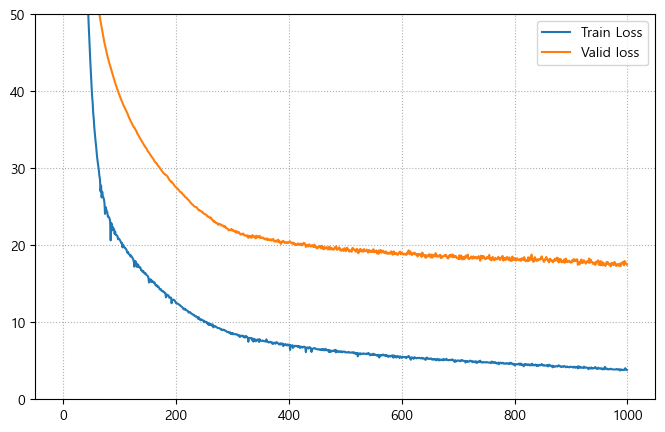

In [83]:
#### 학습결과를 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_loss_list, label='Train Loss')
plt.plot(range(epochs), valid_loss_list, label="Valid loss")
plt.ylim(0, 50)
plt.legend()
plt.grid(True, linestyle=":")
plt.show()

In [84]:
## 모델 저장 - 모델 전체를 저장.
boston_model_save_path = "saved_models/boston_model.pth"
torch.save(model, boston_model_save_path)

In [85]:
### 저장된 모델 load
load_model = torch.load(boston_model_save_path)

In [102]:
########## 새로운 데이터 추정
new_data = torch.tensor(X_test_scaled[:5])
model.eval()
y_hat = model(new_data)

In [103]:
load_model.eval()
with torch.no_grad():
    y_hat2 =load_model(new_data)

In [104]:
new_data.shape, y_hat.shape

(torch.Size([5, 13]), torch.Size([5, 1]))

In [105]:
y_hat

tensor([[23.3089],
        [29.6214],
        [25.1559],
        [11.8053],
        [18.1612]], grad_fn=<AddmmBackward0>)

In [106]:
y_hat2

tensor([[23.3089],
        [29.6214],
        [25.1559],
        [11.8053],
        [18.1612]])

In [101]:
y_test[ :5]

array([[22.6],
       [50. ],
       [23. ],
       [ 8.3],
       [21.2]], dtype=float32)

# 분류 (Classification)

## Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

이미지는 28x28 크기이며 Gray scale이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)들이다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchinfo import summary

import matplotlib.pyplot as plt
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
# device = "mps" if torch.backends.mps.is_available() else "cpu"
print(device)

cpu


In [2]:
### 1. Dataset 생성 - Built-in dataset 이용
root_path = r"C:\Classes\deeplearning\datasets"
trainset = datasets.FashionMNIST(
    root=root_path, train=True, download=True, transform=transforms.ToTensor()
)
testset = datasets.FashionMNIST(
    root=root_path, train=False, download=True, transform=transforms.ToTensor()
)

100%|████████████████████████████████████| 26421880/26421880 [00:18<00:00, 1404425.37it/s]


Extracting C:\Classes\deeplearning\datasets\FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Classes\deeplearning\datasets\FashionMNIST\raw



100%|███████████████████████████████████████████| 29515/29515 [00:00<00:00, 109894.15it/s]


Extracting C:\Classes\deeplearning\datasets\FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Classes\deeplearning\datasets\FashionMNIST\raw



100%|███████████████████████████████████████| 4422102/4422102 [00:11<00:00, 375911.13it/s]


Extracting C:\Classes\deeplearning\datasets\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Classes\deeplearning\datasets\FashionMNIST\raw



100%|████████████████████████████████████████████| 5148/5148 [00:00<00:00, 5096123.91it/s]

Extracting C:\Classes\deeplearning\datasets\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Classes\deeplearning\datasets\FashionMNIST\raw



In [4]:
# Validatation set 을 trainset으로 부터 생성
trainset, validset = torch.utils.data.random_split(trainset, [50000, 10000])
len(trainset), len(testset), len(validset)

(50000, 10000, 10000)

In [6]:
testset.classes
testset.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
x.shape

torch.Size([1, 28, 28])

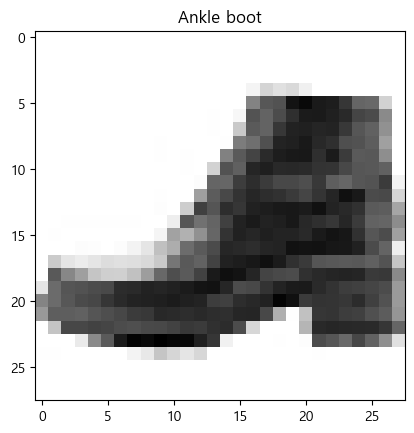

In [16]:
# 입력 이미지 확인
idx = 1187
x, y = testset[idx]
plt.imshow(x.squeeze(), cmap="Greys") # gray: 최소값(black) ~ 최대값(white), Greys: 반대
plt.title(f"{testset.classes[y]}")
plt.show()

In [17]:
### DataLoader 생성
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, drop_last=True)
valid_loader = DataLoader(validset, batch_size=128)
test_loader = DataLoader(testset, batch_size=128)

In [18]:
testset[0][0].shape

torch.Size([1, 28, 28])

In [23]:
############# 모델 정의
class FashionMNISTModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.lr1 = nn.Linear(28*28*1, 1024)  # 첫번째 Layer함수: in-입력데이터 feature수
        self.lr2 = nn.Linear(1024, 512)
        self.lr3 = nn.Linear(512, 256)
        self.lr4 = nn.Linear(256, 128)
        self.lr5 = nn.Linear(128, 64)
        # output layer 함수 - out: 추론할 값의 개수 (다중분류: y의 class 개수)
        self.lr6 = nn.Linear(64, 10) 
        # activation 함수
        self.relu = nn.ReLU()
        
    def forward(self, X):
        # X.shape : (batch크기, channel, height, width)   -입력(1차원)-> Linear()
        # X.shape을 1차원으로 변환: (batch크기, channel*height*width)
        # torch.flatten(X, start_dim=1)
        out = nn.Flatten()(X) # batch축은 유지하고 그 이후 축들을 flatten시킨다. ()
        # lr1 ~ lr6 : lr -> relu : Hidden Layer 계산
        out = self.relu(self.lr1(out))
        out = self.relu(self.lr2(out))
        out = self.relu(self.lr3(out))
        out = self.relu(self.lr4(out))
        out = self.relu(self.lr5(out))
        # lr7 : output layer -> Linear의 처리결과를 출력. (softmax-확률로 계산-는 따로 계산)
        out = self.lr6(out)
        return out        

In [24]:
# 모델구조 확인
f_model = FashionMNISTModel()
print(f_model)

FashionMNISTModel(
  (lr1): Linear(in_features=784, out_features=1024, bias=True)
  (lr2): Linear(in_features=1024, out_features=512, bias=True)
  (lr3): Linear(in_features=512, out_features=256, bias=True)
  (lr4): Linear(in_features=256, out_features=128, bias=True)
  (lr5): Linear(in_features=128, out_features=64, bias=True)
  (lr6): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)


In [25]:
summary(f_model, (128, 1,  28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTModel                        [128, 10]                 --
├─Linear: 1-1                            [128, 1024]               803,840
├─ReLU: 1-2                              [128, 1024]               --
├─Linear: 1-3                            [128, 512]                524,800
├─ReLU: 1-4                              [128, 512]                --
├─Linear: 1-5                            [128, 256]                131,328
├─ReLU: 1-6                              [128, 256]                --
├─Linear: 1-7                            [128, 128]                32,896
├─ReLU: 1-8                              [128, 128]                --
├─Linear: 1-9                            [128, 64]                 8,256
├─ReLU: 1-10                             [128, 64]                 --
├─Linear: 1-11                           [128, 10]                 650
Total params: 1,501,770
Trainable params: 1,501,770
Non-traina

In [26]:
sample = torch.ones((2, 1, 28, 28), dtype=torch.float32)  # 2개 이미지.
y_hat = f_model(sample)
y_hat.shape

torch.Size([2, 10])

In [30]:
# class 별 정답 여부값.
i = y_hat[0].argmax(dim=-1)
testset.classes[i.item()]

'Ankle boot'

In [31]:
 y_hat[0]

tensor([-0.0647,  0.0954,  0.1097, -0.1152, -0.0892,  0.0076, -0.1010, -0.1248,
        -0.0600,  0.1301], grad_fn=<SelectBackward0>)

In [37]:
proba = nn.Softmax(dim=-1)(y_hat)#.sum(dim=-1)
proba

tensor([[0.0953, 0.1119, 0.1135, 0.0906, 0.0930, 0.1025, 0.0919, 0.0898, 0.0958,
         0.1158],
        [0.0953, 0.1119, 0.1135, 0.0906, 0.0930, 0.1025, 0.0919, 0.0898, 0.0958,
         0.1158]], grad_fn=<SoftmaxBackward0>)

In [34]:
y_hat.shape

torch.Size([2, 10])

In [38]:
lr = 0.001
epochs = 20
##### Train -> model, loss_fn, optimizer
##### device로 이동해야 할 것: model, X, y (이 셋은 같은 device에 위치시켜야 한다.)
model = FashionMNISTModel().to(device)
#  다중분류: CrossEntropyLoss()(pred, y) - pred: softmax => log: log_softmax(), y: one-hot encoding
#####CrossEntropyLoss() - 모델추정->softmax를 통과하면 안된다.  정답: one hot encoding 처리하면 안된다.
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
############### 학습 - train loss, validation loss, validation accuray

## 위스콘신 유방암 데이터셋 - 이진분류(Binary Classification) 문제

- **이진 분류 문제 처리 모델의 두가지 방법**
    1. positive(1)일 확률을 출력하도록 구현
        - output layer: units=1, activation='sigmoid'
        - loss: binary_crossentropy
    2. negative(0)일 확률과 positive(1)일 확률을 출력하도록 구현 => 다중분류 처리 방식으로 해결
        - output layer: units=2, activation='softmax', y(정답)은 one hot encoding 처리
        - loss: categorical_crossentropy
        
- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)

# 모델 유형별 구현 정리

## 공통
- Input layer(첫번째 Layer)의 in_features
    - 입력데이터의 feature(속성) 개수에 맞춰준다.
- Hidden layer 수
    - 경험적(art)으로 정한다.
    - Hidden layer에 Linear를 사용하는 경우 보통 feature 수를 줄여 나간다. (핵심특성들을 추출해나가는 과정의 개념.)

## 회귀 모델
- output layer의 출력 unit개수(out_features)
    -  정답의 개수
    - ex
        -  집값: 1
        -  아파트가격, 단독가격, 빌라가격: 3 => y의 개수에 맞춘다.
- 출력 Layer에 적용하는 activation 함수
    - 일반적으로 **None**
    -  값의 범위가 설정되 있고 그 범위의 값을 출력하는 함수가 있을 경우
        - ex) 0 ~ 1: logistic(Sigmoid), -1 ~ 1: hyperbolic tangent(Tanh)
- loss함수
    -  MSELoss
- 평가지표
    - MSE, RMSE, R square($R^2$)

## 다중분류 모델
- output layer의 unit 개수
    - 정답 class(고유값)의 개수
- 출력 Layer에 적용하는 activation 함수
    - Softmax: 클래스별 확률을 출력
- loss함수
    - **categrocial crossentropy**
    - 파이토치 함수
        - **CrossEntropyLoss** = NLLLoss(정답) + LogSoftmax(모델 예측값)
        - **NLLLoss** 
            - 정답을 OneHot Encoding 처리 후 Loss를 계산한다.
	        - 입력으로 LogSoftmax 처리한 모델 예측값과 onehot encoding 안 된 정답을 받는다.
        - **LogSoftmax**
            - 입력값에 Softmax 계산후 그 Log를 계산한다.
                - NLLLoss의 모델 예측값 입력값으로 처리할 때 사용한다.

              
```python
pred = model(input)
loss1 = nn.NLLLoss(nn.LogSoftmax(dim=-1)(pred), y)
# or
loss2 = nn.CrossEntropyLoss()(pred, y)
```    

## 이진분류 모델
- output layer의 unit 개수
    - 1개 (positive일 확률)
- 출력 Layer에 적용하는 activation 함수
    -  Sigmoid(Logistic)
- loss 함수
    - **Binary crossentropy**
    - 파이토치 함수: **BCELoss**